In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#loading in data
dataset = pd.read_csv('loan_data.csv')


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


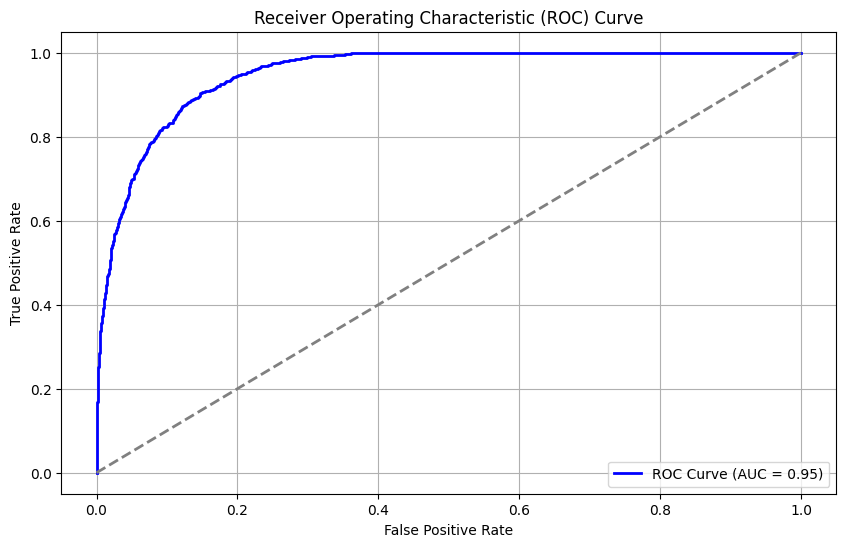

AUC Score: 0.95


In [4]:
#This cell is to finally check the model with ROC/AUC curve
#identify columns
columns = dataset.select_dtypes(include=['object']).columns
dataset = pd.get_dummies(dataset, columns=columns, drop_first=True)

X = dataset.drop('loan_status', axis=1)
y = dataset['loan_status']

#split and normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

best_model = load_model('best_model.h5')
y_pred = best_model.predict(x_test)

#Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
#nw plot ROC curve and everything
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print AUC score
print(f"AUC Score: {roc_auc:.2f}")